## 1.0 IMPORT RELEVANT LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#warnings.filters('ignore')

## 2.0 LOAD DATA

In [2]:
train_data = pd.read_csv('C:/Users/user/Downloads/train_data.csv')
test_data = pd.read_csv('C:/Users/user/Downloads/test_data.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [4]:
train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [6]:
test_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.000000,3069.000000,3069.000000,3056.000000,3069.000000,2341.000000
mean,2013.593679,0.922806,0.224177,1666.790576,2.359400,1966.781717
std,1.372138,0.219066,0.417107,2251.180599,0.998464,25.238702
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,470.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1957.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,30745.000000,4.000000,2012.000000


### 2.1 GET A LIST OF THE VARIABLES WITH MISSING DATA,SPLIT VARIABLES INTO NUMERICALAND CATEGORICAL

In [7]:
# Get the list of missing varaiables
nul_tr = (train_data.isnull().sum() != 0) #returns a bool(True for variable(column)with null vaues, False otherwise) 
missing_train = list(nul_tr[nul_tr].index) #return the index of only the True result(i.e has one or more null values)
nul_te = (test_data.isnull().sum() != 0)
missing_test = list(nul_te[nul_te].index)

print("missing variables in train_data:")
print(missing_train)

print("missing variables in test_data:")
print(missing_test)




missing variables in train_data:
['Garden', 'Building Dimension', 'Date_of_Occupancy', 'Geo_Code']
missing variables in test_data:
['Garden', 'Building Dimension', 'Date_of_Occupancy', 'Geo_Code']


In [8]:
# Get list of categorical variables
cat= (train_data.dtypes == 'object')
categorical = list(cat[cat].index)
print("Categorical variables:")
print(categorical)

#get list of numerical variables
num= (train_data.dtypes != 'object' )
numerical = list(num[num].index)
print('Numerical Variables:')
print(numerical)

Categorical variables:
['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
Numerical Variables:
['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']


In [9]:
#Split the missing into categorical and numerica
missing_cat = []
missing_num = []
for i in train_data:
    if i in missing_train and i in categorical:
        missing_cat.append(i)
    elif i in missing_train and i in numerical:
        missing_num.append(i)

#mis_cat = (i in missing_train and i in categorical)
#missing_cat = list(mis_cat[mis_cat].index)
#mis_num = (i in missing_train and i in numerical)
#missing_num = list(mis_num[mis_num].index)

## 3.0 EXPLORATORY DATA ANALYSIS

### 3.1 UNIVARIATE DISTRIBUTION :CATEGORICAL VARIABLES

In [10]:
# drop the Customer Id column

train_data.drop('Customer Id',axis=1,inplace=True)
test_data.drop('Customer Id',axis=1,inplace= True)

In [11]:
# remove the Custome Id from the list of categorical variables

categorical.remove('Customer Id')

In [12]:
categorical

['Building_Painted',
 'Building_Fenced',
 'Garden',
 'Settlement',
 'NumberOfWindows',
 'Geo_Code']

Building Type and Residential variable although have the int datatype, they are in fact categorical variables, so w include them in the list of categorical variables.

In [13]:
categorical.append('Building_Type')
categorical.append('Residential')

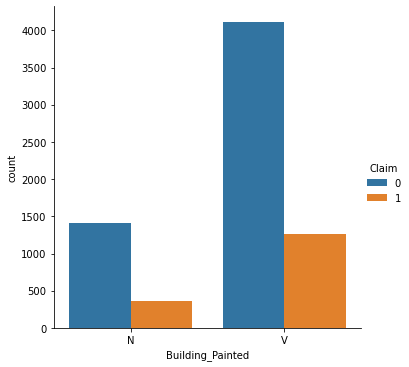

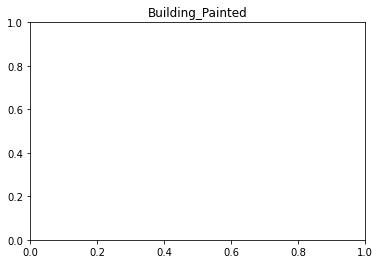

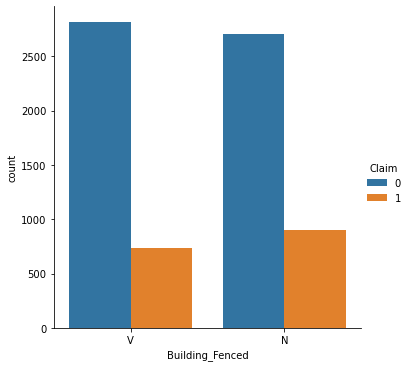

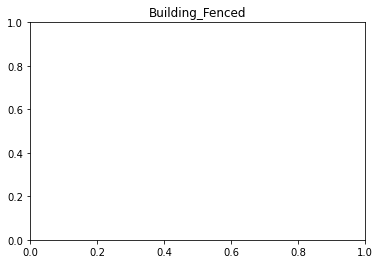

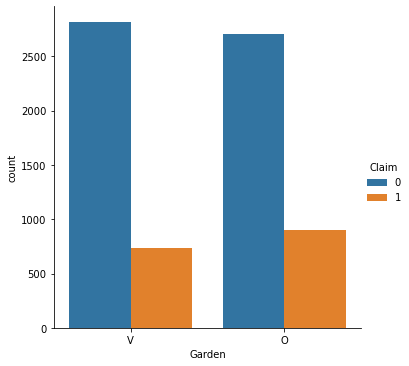

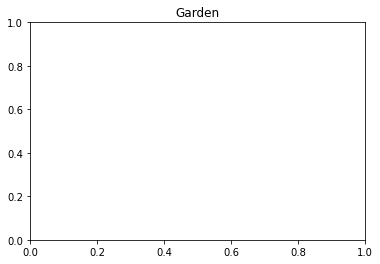

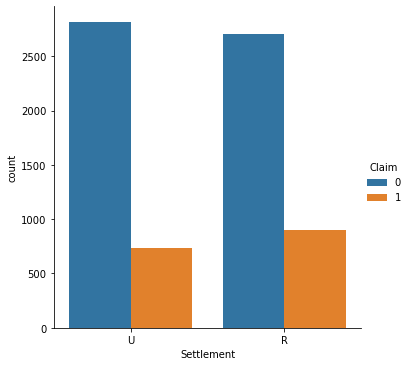

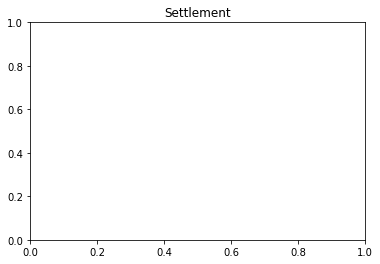

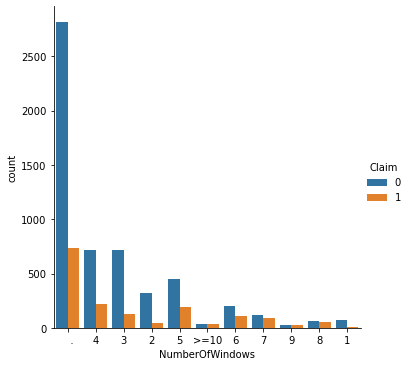

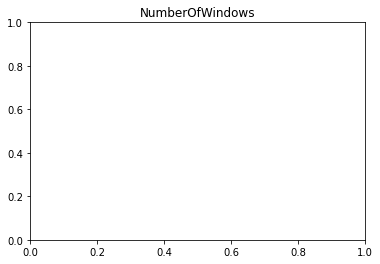

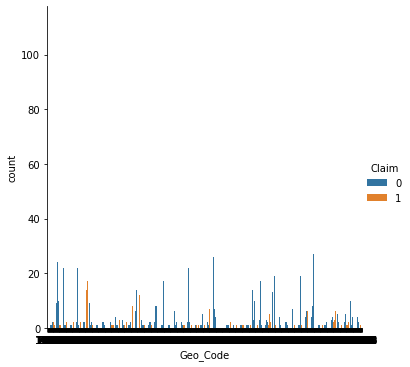

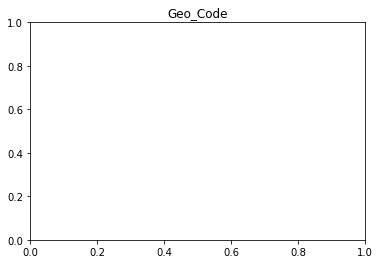

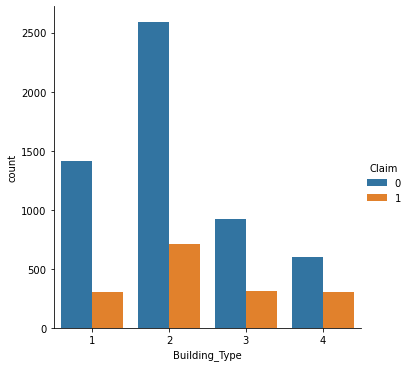

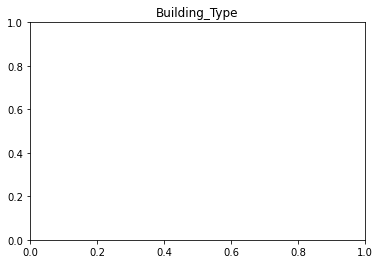

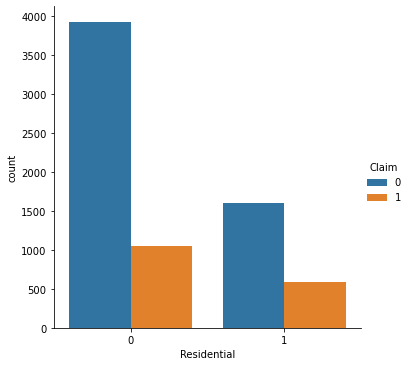

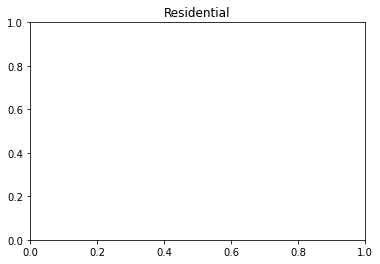

In [14]:
for i in categorical:
    sns.catplot(data= train_data,x=i,kind='count',hue='Claim')
    plt.show()
    plt.title(i)

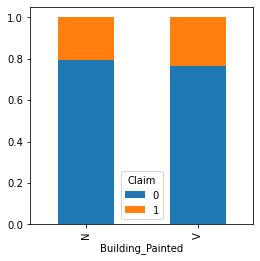

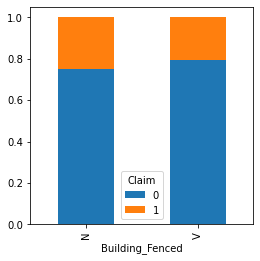

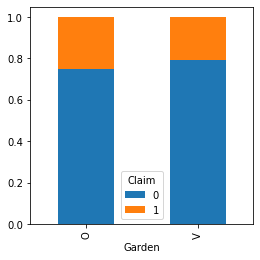

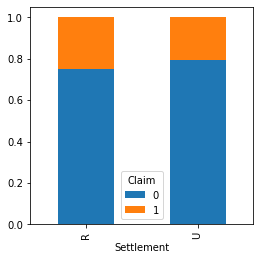

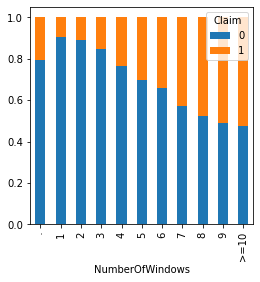

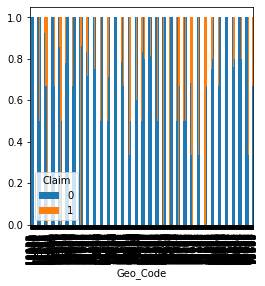

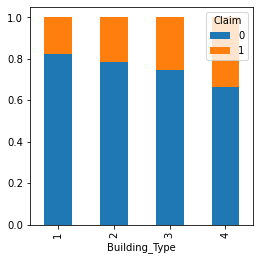

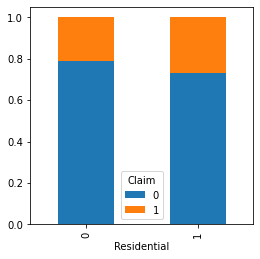

In [15]:
for i in categorical:
    name = pd.crosstab(train_data[i],train_data['Claim'])
    name.div(name.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
    plt.show()

for the Building Painted variable, about 70% of the buildings are painted while others are not.
for the Building Fenced variable, its about a 50/50 distribution, deto for Garden,Residential and Setllement. We can thus create a new variable combining the trio
for the NumberOfWindows variable, the distribution between the Claim value for each of the values of the column seems uniform for 9$>10,8&7,1,2$3,4,5$6, . We can thus combine those values as 1 for the variables
The Geo_Code column seems like a standalone variable, sharing no similarities with other column.

### 3.2 DEALING WITH INDIVIDUAL CATEGORICAL VARIABLES

#### 3.2.1 BUILDING PAINTED

In [16]:
train_data['Building_Painted'].value_counts()

V    5382
N    1778
Name: Building_Painted, dtype: int64

Since i decide to leave this variable as it is and it's not an ordinal variable, I would use One hot encoder for its encoding


In [17]:
#train_data['Building_Painted'].map({'V':0,'N':1})

#### 3.2.2 NUMBER OF WINDOWS VARIABLE

In [18]:
train_data['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

The NumberOfWindows variable is an ordinal variable,so I can create a function to map it  

In [19]:
print(train_data.head(1))

   YearOfObservation  Insured_Period  Residential Building_Painted  \
0               2013             1.0            0                N   

  Building_Fenced Garden Settlement  Building Dimension  Building_Type  \
0               V      V          U               290.0              1   

   Date_of_Occupancy NumberOfWindows Geo_Code  Claim  
0             1960.0               .     1053      0  


In [20]:
def map_windows(data):
    no_of_windows = data['NumberOfWindows']
    
    if no_of_windows == '1' or no_of_windows == '2'  or no_of_windows == '3':
        return 1
    elif no_of_windows == '4' or no_of_windows == '5' or no_of_windows == '6':
        return 2
    elif no_of_windows == '7' or no_of_windows == '8':
        return 3
    elif no_of_windows == '9' or no_of_windows == '>=10':
        return 4 
    else:
        return 0

In [21]:
train_data['Windows'] = train_data.apply(map_windows,axis=1)
test_data['Windows'] = test_data.apply(map_windows,axis=1)

In [22]:
train_data['Windows'].value_counts()

0    3551
2    1884
1    1282
3     327
4     116
Name: Windows, dtype: int64

In [23]:
train_data.drop('NumberOfWindows',axis=1,inplace=True)
test_data.drop('NumberOfWindows',axis=1,inplace=True)

### 3.3 UNIVARIATE DISTRIBUTION: NUMERICAL VARIABLES

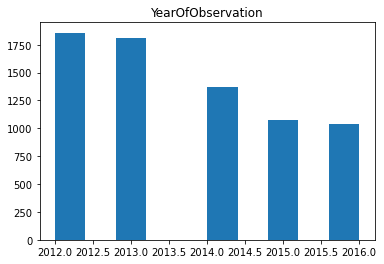

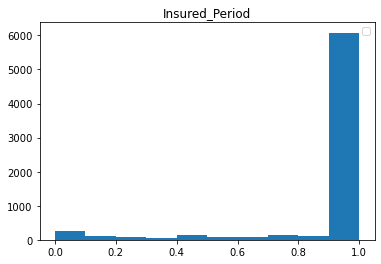

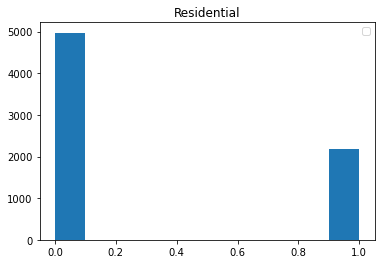

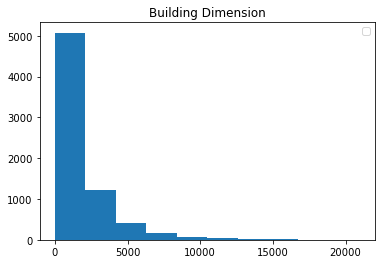

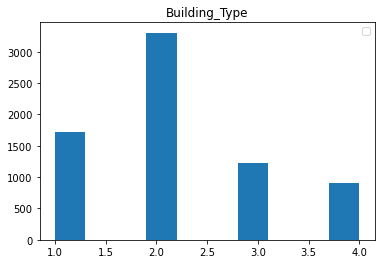

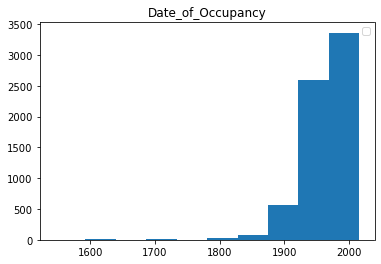

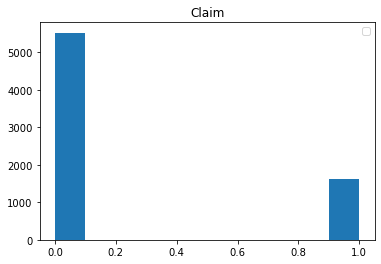

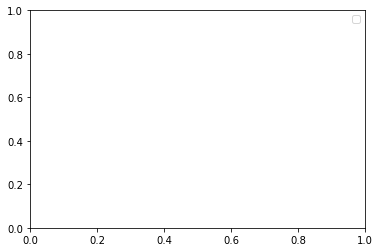

In [24]:
for i in numerical:
    plt.hist(train_data[i])
    plt.title(i)
    plt.show()
    plt.legend(train_data['Claim'])

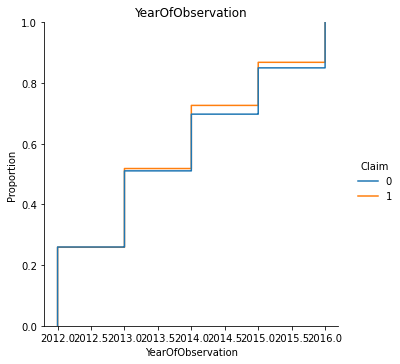

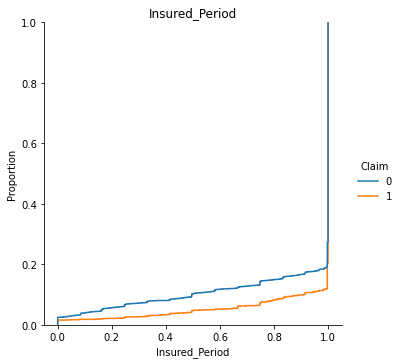

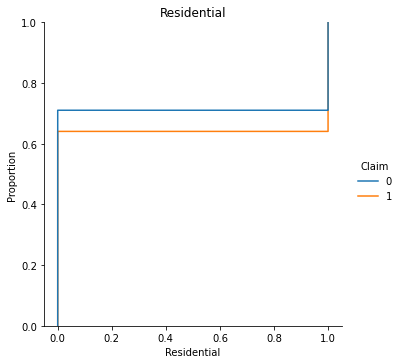

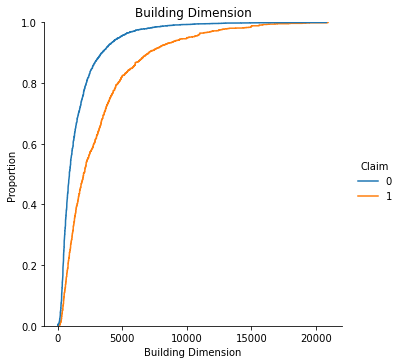

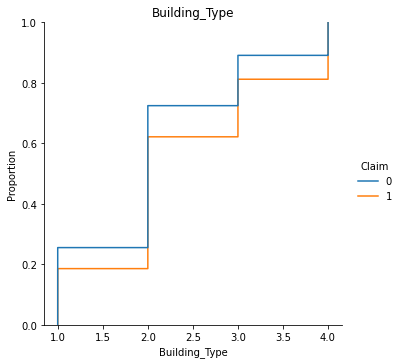

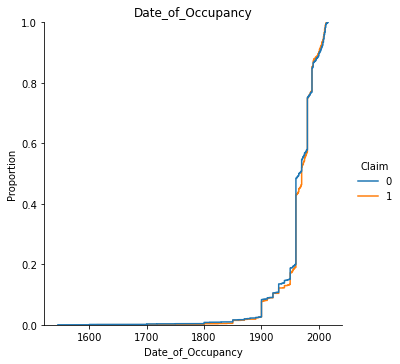

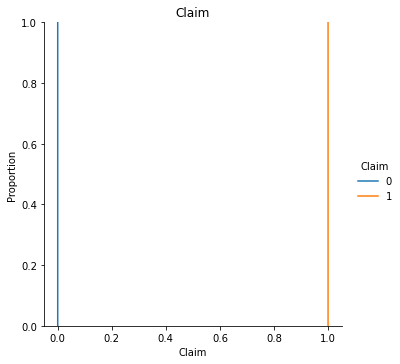

In [25]:
for i in numerical:
    sns.displot(data=train_data,x=i,kind='ecdf',hue='Claim')
    plt.title(i)
    plt.show()

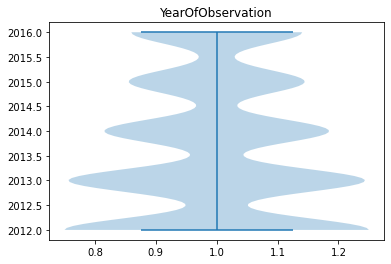

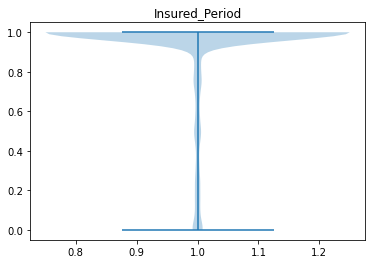

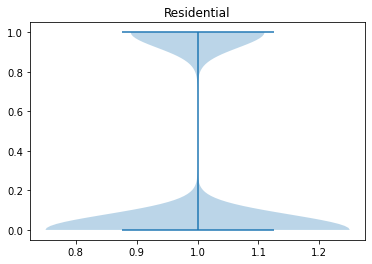

C:\Users\user\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


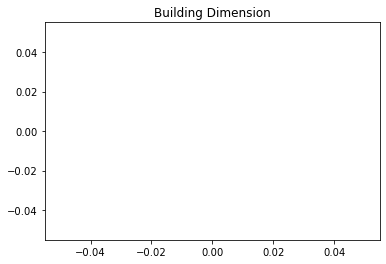

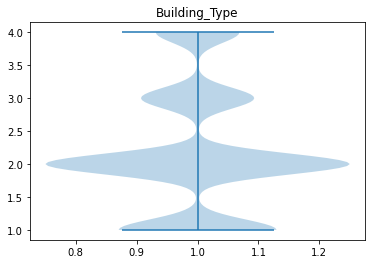

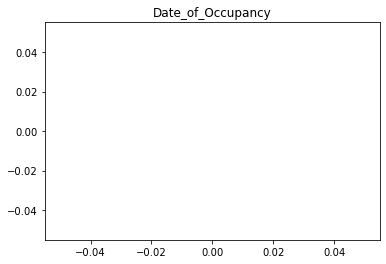

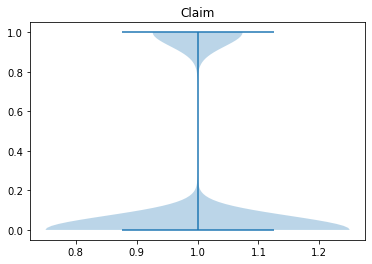

In [26]:
for i in numerical:
    plt.violinplot(train_data[i])
    plt.title(i)
    plt.show()

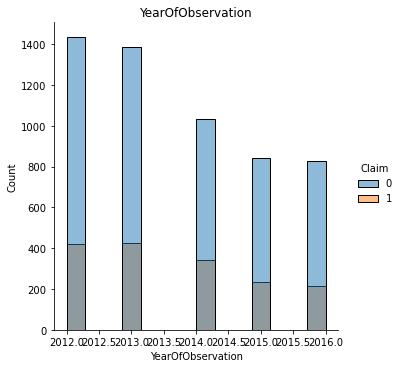

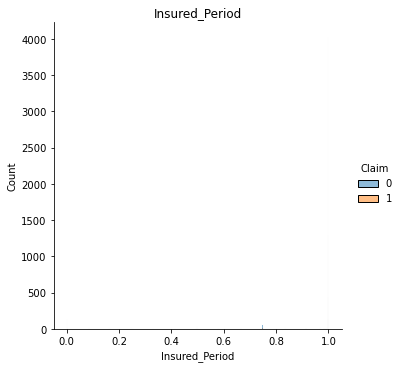

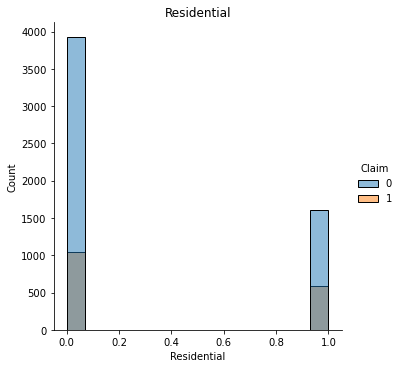

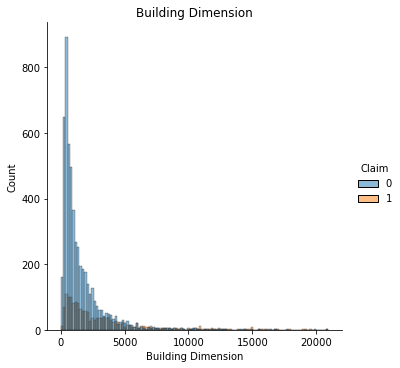

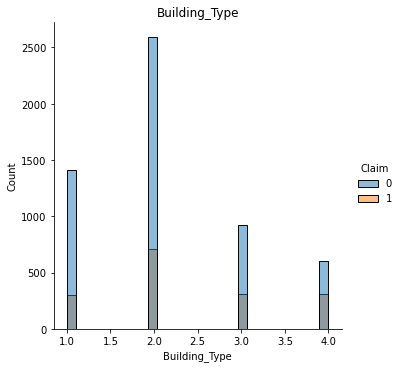

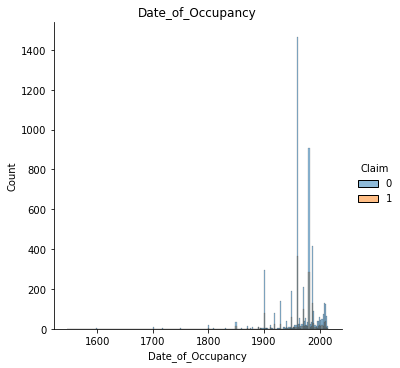

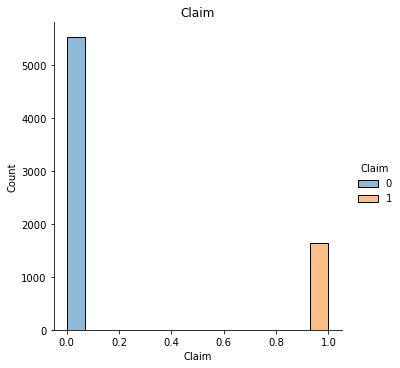

In [27]:
for i in numerical:
    sns.displot(train_data,x=i,hue='Claim')
    plt.title(i)
    plt.show()

It seems like for the Building dimension variable, values from 5000 and above have 0 has Claim value. 
we cann thus categorise all values above 5000 as one



### 3.4 BIVARIATE DISTRIBUTION

## 4.0 DEALING WITH MISSING VALUES 

Remember that we have defined the missing categorical variables as well as the missing numerical variables as missing_cat and missing_num respectively. We can make reference to these two as we impute the null values.


In [28]:
missing_cat

['Garden', 'Geo_Code']

In [29]:
missing_num

['Building Dimension', 'Date_of_Occupancy']

### 4.1 IMPUTING FOR CATEGORICAL VARIABLES HAVING NULL VALUES

In [30]:
train_data[missing_train].isnull().sum()

Garden                  7
Building Dimension    106
Date_of_Occupancy     508
Geo_Code              102
dtype: int64

In [31]:
test_data[missing_test].isnull().sum()

Garden                  4
Building Dimension     13
Date_of_Occupancy     728
Geo_Code               13
dtype: int64

In [32]:
train_data[missing_cat]

,Garden,Geo_Code
0,V,1053
1,O,1053
2,V,1053
3,V,1053
4,O,1053
...,...,...
7155,V,NaN
7156,V,NaN
7157,V,NaN
7158,V,NaN


In [33]:
from sklearn.impute import SimpleImputer
cat_transformer = SimpleImputer(strategy='most_frequent')
train_data[missing_cat]=cat_transformer.fit_transform(train_data[missing_cat])
test_data[missing_cat] = cat_transformer.fit_transform(test_data[missing_cat])

In [34]:
train_data[missing_cat] 

,Garden,Geo_Code
0,V,1053
1,O,1053
2,V,1053
3,V,1053
4,O,1053
...,...,...
7155,V,6088
7156,V,6088
7157,V,6088
7158,V,6088


In [35]:
test_data['Geo_Code'].isnull().sum()

0

### 4.2 IMPUTING FOR NUMERICAL VARIABLES HAVING NULL VALUES

In [36]:
train_data[missing_num].isnull().sum()

Building Dimension    106
Date_of_Occupancy     508
dtype: int64

In [37]:
for i in train_data[missing_num]:
    train_data[i].fillna(train_data[i].mean(),inplace=True)
    train_data[i+'is missing'] = train_data[i].isnull()
for i in test_data[missing_num]:
    test_data[i].fillna(test_data[i].mean(),inplace=True)
    test_data[i+'is missing'] = test_data[i].isnull()

In [38]:
test_data[missing_num].isnull().sum()

Building Dimension    0
Date_of_Occupancy     0
dtype: int64

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YearOfObservation             7160 non-null   int64  
 1   Insured_Period                7160 non-null   float64
 2   Residential                   7160 non-null   int64  
 3   Building_Painted              7160 non-null   object 
 4   Building_Fenced               7160 non-null   object 
 5   Garden                        7160 non-null   object 
 6   Settlement                    7160 non-null   object 
 7   Building Dimension            7160 non-null   float64
 8   Building_Type                 7160 non-null   int64  
 9   Date_of_Occupancy             7160 non-null   float64
 10  Geo_Code                      7160 non-null   object 
 11  Claim                         7160 non-null   int64  
 12  Windows                       7160 non-null   int64  
 13  Bui

In [40]:
test_data[missing_num]

,Building Dimension,Date_of_Occupancy
0,300.000000,1960.0
1,300.000000,1960.0
2,790.000000,1960.0
3,1405.000000,2004.0
4,1405.000000,2004.0
...,...,...
3064,1666.790576,1900.0
3065,1666.790576,1948.0
3066,1666.790576,1993.0
3067,1666.790576,1800.0


In [41]:
train_no_null = train_data.copy()
test_no_null = test_data.copy()

## 5.0 DEALING WITH OUTLIERS

create a function to check for outliers

In [42]:
for i in train_data[numerical]:
    print(i)

YearOfObservation
Insured_Period
Residential
Building Dimension
Building_Type
Date_of_Occupancy
Claim


though there are five of the features with the int or float data type, however only 4 are real numerical variables(YearOfObservation,Insured_Period,Building Dimesion and Date_of_Occupancy), others are categorical variables 

We can thus remove the remaining 3(Residential,Building_Type,Claim) variables from the list and check for outliers on the reamining real numerical variables.

In [43]:
#numerical.remove(['Claim','Residential','Building_Type'])
numerical.remove('Claim')
numerical.remove('Residential')
numerical.remove('Building_Type')

Define a function to check for outliers

In [44]:
def outliers(data,column):
    from scipy.stats import iqr
    result = []
    for i in data[column]:
        count=0
        IQR = iqr(data[i])
        Q = np.quantile(data[i],[0,0.25,0.5,0.75,1])
        lower_threshold = np.quantile(data[i],0.25)-1.5*IQR
        upper_threshold = np.quantile(data[i],0.75)+1.5*IQR
        for k in data[i]:
            if k<lower_threshold or k>upper_threshold:
                count += 1
            else:
                count += 0
        result.append(print(i,':outliers =',count,',lower_threshold =',lower_threshold ,',upper_threshold =',upper_threshold,
                                'Q1 =',Q[1],',Q2 =',Q[2],',Q3 =',Q[3],',Q4 =',Q[4],',iqr =',IQR))
        return result

In [45]:
outliers(train_no_null,numerical)

YearOfObservation :outliers = 0 ,lower_threshold = 2007.5 ,upper_threshold = 2019.5 Q1 = 2012.0 ,Q2 = 2013.0 ,Q3 = 2015.0 ,Q4 = 2016.0 ,iqr = 3.0


[None]

So, YearOfObservation column has no outliers, Good...I am super happy, no stress...Not yet though, the other 3 columns has outliers but we can deal with it.

As for the the Insured_Period variable, there are quite a number of outliers..over 5% of the total data.so it's not in our best interest to drop the outliers. A better alternative is to examine the column and merge and map since its an hierachical data.

The Building Dimension and the Date_of_Occupancy column have outliers whose number are not so far off from each other. remember that both had missing data that we imputed already and we have 2 new bool columns showing the orginally missing values in each of the columns.

As for the Building Dimension variable, the outliers are more than 5% of the total data, so we can't drop the outliers. Let's further inspect the column to see what we can do

As for the Date_of_Occupancy column, it might be a good option to just create a new variable from it and the YearOfObservation columns and identify it as BUILDING AGE. The outliers might not be soo much if we do that...we can run the outlier test on the new variable and see if we would still need to make some ammedments

Can we get started alreeaaddyyy!!!

### 5.1 DEALING WITH THE individual NUMERICAL VARIABLES containing outliers

#### 5.1.1 INSURED PERIOD variable

In [46]:
train_no_null['Insured_Period'].value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.680328       1
0.819672       1
0.792350       1
0.378082       1
0.803279       1
Name: Insured_Period, Length: 401, dtype: int64

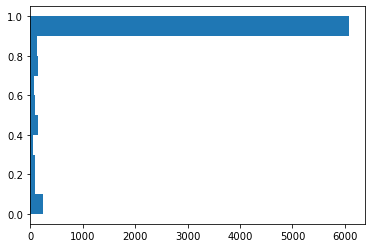

In [47]:
plt.hist(train_no_null['Insured_Period'],orientation='horizontal')
plt.show()

From the value_counts as well as the violinplot and the histogram we visualized 3.4 above, it's obvious that most customers had a 1 year insurance period..about 74%, followed by 0.997268 that has about 8%, the 0.0 having about 2% while the remaining shares the remaining 16%.

I would thus merge and map(label encoding sort of) the values in the column.
(=0) --- 0
(>0.1-<0.5)--1
(>0.5-=0.99)---2
(0.99-<1.0)---3
(=1)---4

In [48]:
def map_insured(data):
    insured= data['Insured_Period']
    if insured == 0:
        return 0
    elif insured>0 and insured<0.5:
        return 1
    elif insured>0.5 and insured<0.99:
        return 2
    elif insured>0.99 and insured<1:
        return 3
    else:
        return 4

In [49]:
train_no_null['Insured_time'] = train_data.apply(map_insured,axis=1)

In [50]:
test_no_null['Insured_time'] = test_data.apply(map_insured,axis=1)

In [51]:
test_no_null['Insured_time'].value_counts()

4    2389
3     228
1     222
2     197
0      33
Name: Insured_time, dtype: int64

We can now drop the Insured_Period column from the data since we have created a new Insured_time column

In [52]:
train_no_null.drop('Insured_Period',axis=1,inplace=True)
test_no_null.drop('Insured_Period',axis=1,inplace=True)

#### 5.1.2 BUILDING DIMENSION variable

In [53]:
train_no_null['Building Dimension'].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
211.0       1
3324.0      1
1228.0      1
3762.0      1
1734.0      1
Name: Building Dimension, Length: 2044, dtype: int64

(array([5181., 1227.,  414.,  156.,   74.,   50.,   22.,   23.,    6.,
           7.]),
 array([1.00000e+00, 2.09490e+03, 4.18880e+03, 6.28270e+03, 8.37660e+03,
        1.04705e+04, 1.25644e+04, 1.46583e+04, 1.67522e+04, 1.88461e+04,
        2.09400e+04]),
 <BarContainer object of 10 artists>)

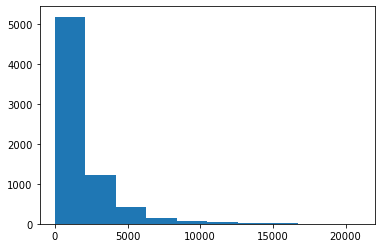

In [54]:
plt.hist(train_no_null['Building Dimension'])

In [55]:
train_no_null['Building Dimension'].max()

20940.0

In [56]:
train_no_null['Building Dimension'].min()

1.0

In [57]:
np.quantile(train_no_null['Building Dimension'],[0,0.25,0.5,0.75,1])

array([1.000e+00, 5.315e+02, 1.100e+03, 2.250e+03, 2.094e+04])

In [58]:
0< -2046.25

False

count the number of values of Building DImension that are above 5000...this is to get the number of outliers we ca eventually remove.

The total number of outliers for this variable is 572, the lower threshold is -2046.25 while the upper threshold is 4827.75.The number of values below the lower threshold is 0 while that above the upper threshold is 572. The four quartiles are Q1 = 531.5 ,Q2 = 1100.0 ,Q3 = 2250.0 ,Q4 = 20940.0

There is a problem for the lower threshold to be negative since the minimum value in the column is 1 and not even a negative value. Rather all the outliers fall in the greater than the upper threshold category

Since all the outliers are greater than the upperthreshold, we can simply replace the outliers with the upperthreshold value which is 4827.75

In [59]:
train_no_null['Building Dimension'].min()

1.0

In [60]:
x = train_no_null['Building Dimension']
outlier_below_lower_thresh = 0
outlier_above_upper_thresh = 0
for i in x:
    if i < -2046.25:
        outlier_below_lower_thresh += 1
for i in x:
    if i >6150:
        outlier_above_upper_thresh += 1
        print(i)
print('outlier_below_lower_thresh',outlier_below_lower_thresh)
print('outlier_above_upper_thresh',outlier_above_upper_thresh)

6510.0
9570.0
7063.0
18000.0
9920.0
7887.0
6300.0
10573.0
12900.0
12900.0
6984.0
7223.0
9400.0
8400.0
9500.0
7300.0
6650.0
6650.0
12721.0
12721.0
12721.0
6600.0
8265.0
10600.0
8000.0
15000.0
15000.0
12470.0
12961.0
7291.0
11547.0
8570.0
7460.0
11000.0
11000.0
7838.0
11380.0
6410.0
7480.0
7700.0
8641.0
7186.0
7500.0
7200.0
6317.0
6500.0
8000.0
9999.0
9999.0
6459.0
6900.0
17860.0
14950.0
14950.0
6980.0
6260.0
7344.0
7344.0
7200.0
10686.0
9000.0
6468.0
6468.0
6800.0
6657.0
12500.0
7259.0
7259.0
9122.0
6766.0
8485.0
8485.0
8485.0
8100.0
6300.0
6300.0
6300.0
7500.0
7500.0
16859.0
8900.0
8960.0
8960.0
8500.0
8500.0
9618.0
8820.0
14200.0
6628.0
6628.0
10840.0
8950.0
10200.0
8796.0
11037.0
17800.0
9609.0
7900.0
11958.0
11958.0
7200.0
6920.0
8140.0
6959.0
6959.0
20940.0
7750.0
7750.0
8015.0
8015.0
6180.0
11925.0
10954.0
18950.0
16149.0
12448.0
7036.0
8700.0
7055.0
8900.0
14120.0
8697.0
8916.0
8350.0
6896.0
6896.0
10173.0
6500.0
11000.0
9000.0
7302.0
8957.0
8893.0
6252.0
7500.0
14472.0
7863.0
91

In [61]:
train_no_null['Building Dimension'].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
211.0       1
3324.0      1
1228.0      1
3762.0      1
1734.0      1
Name: Building Dimension, Length: 2044, dtype: int64

In [62]:
train_no_null['Building Dimension'] = np.where((train_no_null['Building Dimension'] > 4827.75),4827.75,train_no_null['Building Dimension'])

In [63]:
train_no_null['Building Dimension'].value_counts()

4827.75    572
400.00     150
500.00     120
300.00     118
450.00     117
          ... 
2875.00      1
2830.00      1
2285.00      1
2423.00      1
3335.00      1
Name: Building Dimension, Length: 1677, dtype: int64

In [64]:
train_no_null['Building Dimension'].isnull().sum()

0

In [65]:
Building = ['Building Dimension']
outliers(train_no_null,Building)

Building Dimension :outliers = 0 ,lower_threshold = -2046.25 ,upper_threshold = 4827.75 Q1 = 531.5 ,Q2 = 1100.0 ,Q3 = 2250.0 ,Q4 = 4827.75 ,iqr = 1718.5


[None]

#### 5.1.2 DATE_OF_OCCUPANCY variable

In [66]:
date = ['Date_of_Occupancy']
outliers(train_no_null,date)

Date_of_Occupancy :outliers = 908 ,lower_threshold = 1930.0 ,upper_threshold = 2010.0 Q1 = 1960.0 ,Q2 = 1964.456404088996 ,Q3 = 1980.0 ,Q4 = 2016.0 ,iqr = 20.0


[None]

In [67]:
train_no_null['Date_of_Occupancy'].value_counts()

1960.000000    1818
1980.000000    1155
1988.000000     530
1964.456404     508
1900.000000     371
               ... 
1919.000000       1
1926.000000       1
1938.000000       1
1931.000000       1
1927.000000       1
Name: Date_of_Occupancy, Length: 135, dtype: int64

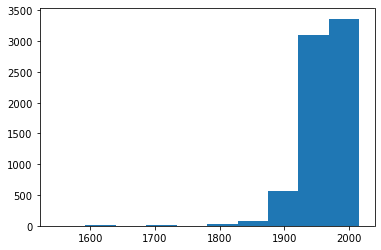

In [68]:
plt.hist(train_no_null['Date_of_Occupancy'])
plt.show()

In [69]:
x = train_no_null['Date_of_Occupancy']
count = 0

for i in x:
    if i>1800 and i<1930:
        count += 1
    
print(count)

665


In [70]:
for i in x:
    if i==1930:
        count += 1
    
print(count)

832


Also the first quartile,Q1 is 1960 which is more than the lower threshold...I can thus replace all values below 1930 with 1800 or 1930 and I replace all values above 2010 which is the upper threshold with 2010

there are 1320 values of the Date_of_Occupancy variable that are less than 1960
there are 24 values of the Date_of_Occupancy variable that are less than 1800
there are 175 values of the Date_of_Occupancy variable that are less than 1900

The total nmber of outliers for this variable is 908, the lower threshold is 1930 while the upper threshold is 2010.The number of values below the lower threshold,1930 is 713 while that above the upper threshold,2010 is 195.
 
 I can thus replace all values below the lower threshold value,1930 with the lower thrshold value and replace values above the upper threshold with the upperthreshold value,2010.

In [71]:
train_no_null['Date_of_Occupancy'] = np.where((train_no_null['Date_of_Occupancy'] < 1930),1930,train_no_null['Date_of_Occupancy'])
train_no_null['Date_of_Occupancy']= np.where((train_no_null['Date_of_Occupancy'] > 2010),2010,train_no_null['Date_of_Occupancy'])

In [72]:
outliers(train_no_null,date)

Date_of_Occupancy :outliers = 0 ,lower_threshold = 1930.0 ,upper_threshold = 2010.0 Q1 = 1960.0 ,Q2 = 1964.456404088996 ,Q3 = 1980.0 ,Q4 = 2010.0 ,iqr = 20.0


[None]

In [73]:
train_no_null['Date_of_Occupancy'].value_counts()

1960.000000    1818
1980.000000    1155
1930.000000     880
1988.000000     530
1964.456404     508
               ... 
1938.000000       1
1931.000000       1
1946.000000       1
1939.000000       1
1934.000000       1
Name: Date_of_Occupancy, Length: 77, dtype: int64

## 6.0 FEATURE ENGINEERING

### 6.1 CREATING A NEW FEATURE FROM BUILDING FENCED AND GARDEN 

In [74]:
def modern_old(data):
    garden = data['Garden']
    fenced = data['Building_Fenced']
    if garden == 'V' and fenced == 'V': #Has garden and is not fenced
        return 'old'
    else:
        #garden == 'O' and fenced == 'N':#has no garden but fenced
        return 'modern'

In [75]:
train_no_null['Building_Class'] = train_no_null.apply(modern_old,axis=1)
test_no_null['Building_Class']=test_no_null.apply(modern_old,axis=1)

In [76]:
test_no_null['Building_Class'].value_counts()

old       2240
modern     829
Name: Building_Class, dtype: int64

In [77]:
train_no_null.drop('Garden',axis=1,inplace=True)

test_no_null.drop('Building_Fenced',axis=1,inplace=True)

In [78]:
test_no_null.drop('Garden',axis=1,inplace=True)
train_no_null.drop('Building_Fenced',axis=1,inplace=True)

### 6.2 CREATING A NEW FEATURE FROM RESIDENTIAL AND SETTLEMENT

In [79]:
def building_cat(data):
    residential = data['Residential']
    settlement = data['Settlement']
    if   settlement == 'R' and residential == 0:
        return 'Rural Non-Residential'
    elif  settlement == 'R' and residential == 1:
        return 'Rural Residential'
    elif settlement == 'U' and residential == 0:
        return 'Urban Non-Residential'
    elif settlement == 'U' and residential == 1:
        return 'Urban Residential'

In [80]:
train_no_null['Building_category'] = train_no_null.apply(building_cat,axis=1)
test_no_null['Building_category']=test_no_null.apply(building_cat,axis=1)

In [81]:
train_no_null['Building_category'].value_counts()

Urban Non-Residential    2602
Rural Non-Residential    2371
Rural Residential        1239
Urban Residential         948
Name: Building_category, dtype: int64

In [82]:
train_no_null.drop('Residential',axis=1,inplace=True)
test_no_null.drop('Settlement',axis=1,inplace=True)

In [83]:
test_no_null.drop('Residential',axis=1,inplace=True)
train_no_null.drop('Settlement',axis=1,inplace=True)

### 6.2 CREATING A NEW FEATURE FROM  Date_of_Occupancy and YearOfObservation


In [84]:
def building_age(data):
    date = data['Date_of_Occupancy']
    year = data['YearOfObservation']
    age = year-date
    return age

In [85]:
train_no_null['Building_age'] = train_no_null.apply(building_age,axis=1)
test_no_null['Building_age'] = test_no_null.apply(building_age,axis=1)

In [86]:
test_no_null['Building_age'].isnull().sum()

0

In [87]:
train_no_null.drop(['Date_of_Occupancy','YearOfObservation'],axis=1,inplace=True)
test_no_null.drop(['Date_of_Occupancy','YearOfObservation'],axis=1,inplace=True)

First, save the preprocessed data as a csv file 

In [88]:
train_no_null.to_csv('insured_prepro_train.csv')
test_no_null.to_csv('insure_prepro_test.csv')

In [89]:
pd.read_csv('insured_prepro_train.csv')

,Unnamed: 0,Building_Painted,Building Dimension,Building_Type,Geo_Code,Claim,Windows,Building Dimensionis missing,Date_of_Occupancyis missing,Insured_time,Building_Class,Building_category,Building_age
0,0,N,290.00000,1,1053,0,0,False,False,4,old,Urban Non-Residential,53.0
1,1,V,490.00000,1,1053,0,2,False,False,4,modern,Rural Non-Residential,85.0
2,2,N,595.00000,1,1053,0,0,False,False,4,old,Urban Non-Residential,54.0
3,3,V,2840.00000,1,1053,0,0,False,False,4,old,Urban Non-Residential,53.0
4,4,V,680.00000,1,1053,0,1,False,False,4,modern,Rural Non-Residential,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,7155,V,1883.72753,1,6088,0,0,False,False,4,old,Urban Residential,11.0
7156,7156,V,1883.72753,2,6088,1,0,False,False,4,old,Urban Non-Residential,33.0
7157,7157,V,1883.72753,1,6088,0,0,False,False,1,old,Urban Non-Residential,24.0
7158,7158,V,1883.72753,1,6088,0,0,False,False,4,old,Urban Non-Residential,41.0
